<a href="https://colab.research.google.com/github/kt3472/oss_ai_class/blob/master/practice_1116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install catboost
# !pip install keras
# !pip install geopy
# !pip install plotly
# !pip install cufflinks
# !pip install fbprophet
# !pip install shap

In [0]:
import os

import pandas as pd
import numpy as np

from datetime import datetime , timedelta
import warnings
import itertools
from itertools import product
from tqdm import tqdm_notebook
from math import sqrt

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import keras as K

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 20, 10

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

%matplotlib inline


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.listdir("./drive/My Drive/Colab Notebooks")

['Day2-regression.ipynb의 사본',
 'Day2-classification.ipynb의 사본',
 'CNN.ipynb',
 '(6) SA-w2v-CuDNNLSTM-stacked+bidirectional+dropout.ipynb',
 '(3) SA-w2v-CuDNNLSTM.ipynb',
 '(2) SA-w2v-SimpleRNN.ipynb',
 '(4) SA-w2v-CuDNNLSTM-stacked.ipynb',
 '(5) SA-w2v-CuDNNLSTM-stacked+bidirectional.ipynb',
 'best_model.h5',
 '(8) SA-w2v-CuDNNLSTM-model_load-evaluate.ipynb',
 '(10) SA-practice.ipynb',
 'best_model_GRU.h5',
 '(11) SA-practice-solution.ipynb의 사본',
 '(9) SA-w2v-CuDNNLSTM-model_load-inference.ipynb',
 '(7) SA-w2v-CuDNNLSTM-model_save.ipynb',
 'preprocessed_data.pkl',
 'figure.png',
 'add_lat_lon.csv',
 'Superstore.xls',
 'eval_data.csv',
 '데이터뽀개기발표_v.003.pdf',
 '(1) SA-w2v-preprocessing.ipynb',
 'final_version (2).ipynb',
 'Untitled0.ipynb']

In [0]:
df_apt = pd.read_csv("./drive/My Drive/Colab Notebooks/eval_data.csv")

In [0]:
df_apt.shape

(1121686, 24)

In [0]:
df_apt.head()

,transaction_year_month,trade_price,year_built,transaction_day,exclusive_use_area,floor,apt_id,lat,lng,dong_cd,tot_parking,tot_household_cnt,apt_building_cnt,floor_high,floor_low,heat_type,heat_fuel,room_id,supply_area,household_cnt,room_cnt,bathroom_cnt,front_structure,local1
0,200601,29500,1983,17,93.40,6,12471,37.571863,126.973317,1111011700,121.0,72,1,10.0,10.0,central,gas,188354,93.70,2,NaN,NaN,NaN,서울특별시
1,200601,15741,1998,9,57.18,12,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175347,70.92,1,2.0,1.0,corridor,서울특별시
2,200601,15741,1998,9,57.18,12,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175348,75.09,9,2.0,1.0,corridor,서울특별시
3,200601,23198,1998,10,84.26,6,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175354,110.65,9,3.0,1.0,corridor,서울특별시
4,200601,23198,1998,12,84.26,14,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175354,110.65,9,3.0,1.0,corridor,서울특별시


In [0]:
df_apt.isna().sum()

transaction_year_month    0    
trade_price               0    
year_built                0    
transaction_day           0    
exclusive_use_area        0    
floor                     0    
apt_id                    0    
lat                       0    
lng                       0    
dong_cd                   0    
tot_parking               50416
tot_household_cnt         0    
apt_building_cnt          0    
floor_high                0    
floor_low                 102  
heat_type                 588  
heat_fuel                 5100 
room_id                   0    
supply_area               0    
household_cnt             0    
room_cnt                  6690 
bathroom_cnt              6690 
front_structure           16190
local1                    0    
dtype: int64

In [0]:
df_apt.dtypes

transaction_year_month    int64  
trade_price               int64  
year_built                int64  
transaction_day           int64  
exclusive_use_area        float64
floor                     int64  
apt_id                    int64  
lat                       float64
lng                       float64
dong_cd                   int64  
tot_parking               float64
tot_household_cnt         int64  
apt_building_cnt          int64  
floor_high                float64
floor_low                 float64
heat_type                 object 
heat_fuel                 object 
room_id                   int64  
supply_area               float64
household_cnt             int64  
room_cnt                  float64
bathroom_cnt              float64
front_structure           object 
local1                    object 
dtype: object

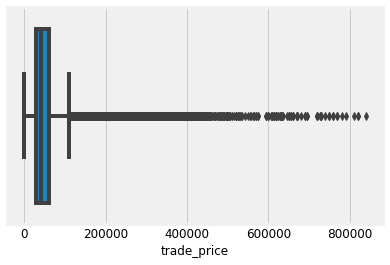

In [0]:
sns.boxplot(x=df_apt['trade_price'])

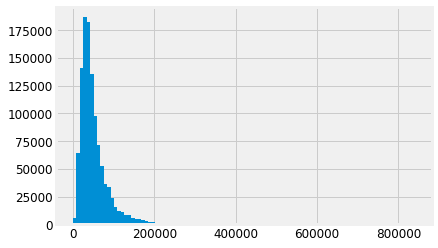

In [0]:
df_apt["trade_price"].hist(bins=100)

In [0]:
df_apt["lng"].min(),   df_apt["lng"].max()

(126.80610153120371, 127.18079399999999)

In [0]:
df_apt["lat"].min(), df_apt["lat"].max()

(37.441254, 37.68763299875252)

In [0]:
ruh_m = plt.imread('./drive/My Drive/Colab Notebooks/800px-Map_Seoul.jpg')

In [0]:
BBox = ((df_apt["lng"].min(),   df_apt["lng"].max(),      
         df_apt["lat"].min(), df_apt["lat"].max()))

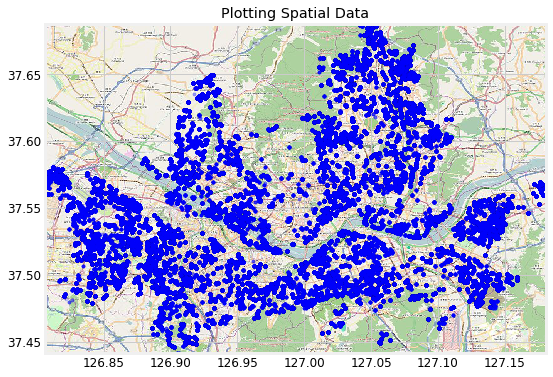

In [0]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_apt["lng"], df_apt["lat"], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [0]:
df_apt_raw = df_apt.copy()

In [0]:
df_apt_raw.dtypes

transaction_year_month    int64  
trade_price               int64  
year_built                int64  
transaction_day           int64  
exclusive_use_area        float64
floor                     int64  
apt_id                    int64  
lat                       float64
lng                       float64
dong_cd                   int64  
tot_parking               float64
tot_household_cnt         int64  
apt_building_cnt          int64  
floor_high                float64
floor_low                 float64
heat_type                 object 
heat_fuel                 object 
room_id                   int64  
supply_area               float64
household_cnt             int64  
room_cnt                  float64
bathroom_cnt              float64
front_structure           object 
local1                    object 
dtype: object

In [0]:
df_apt_raw["room_cnt"]

0         NaN 
1          2.0
2          2.0
3          3.0
4          3.0
          ... 
1121681    3.0
1121682    3.0
1121683    3.0
1121684    1.0
1121685    3.0
Name: room_cnt, Length: 1121686, dtype: float64

# null 값 검토

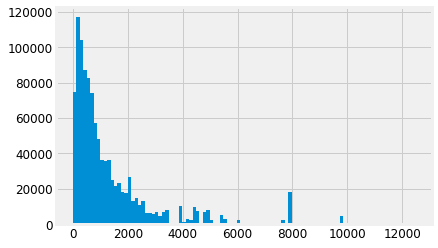

In [0]:
df_apt["tot_parking"].hist(bins=100)
  

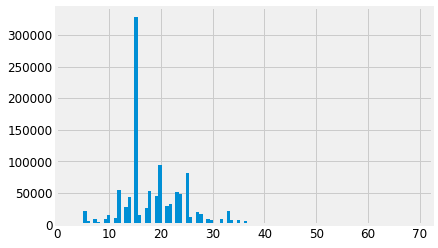

In [0]:
df_apt["floor_high"].hist(bins=100)

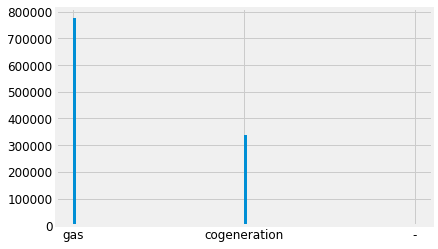

In [0]:
df_apt["heat_fuel"].hist(bins=100)

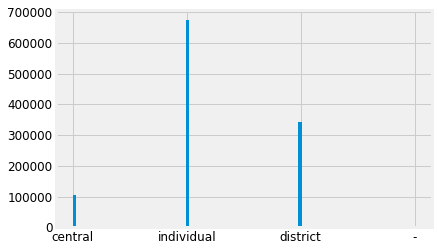

In [0]:
df_apt["heat_type"].hist(bins=100)

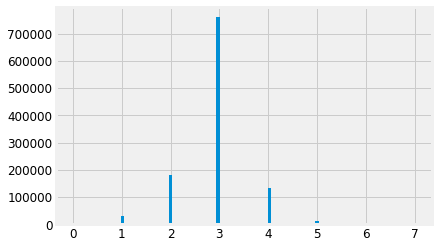

In [0]:
df_apt["room_cnt"].hist(bins=100)


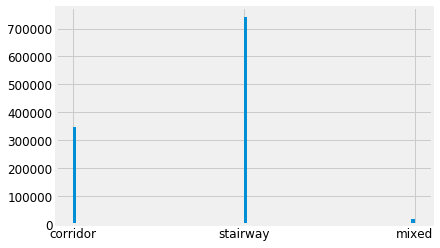

In [0]:
df_apt["front_structure"].hist(bins=100)

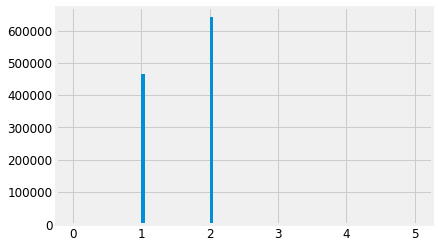

In [0]:
df_apt["bathroom_cnt"].hist(bins=100)

# null 값제거

In [0]:
df_apt_raw.shape

(1121686, 24)

In [0]:
df_apt_dn = df_apt_raw.dropna()

In [0]:
df_apt_dn.shape

(1052855, 24)

In [0]:
df_apt_dn.isnull().sum()

transaction_year_month    0
trade_price               0
year_built                0
transaction_day           0
exclusive_use_area        0
floor                     0
apt_id                    0
lat                       0
lng                       0
dong_cd                   0
tot_parking               0
tot_household_cnt         0
apt_building_cnt          0
floor_high                0
floor_low                 0
heat_type                 0
heat_fuel                 0
room_id                   0
supply_area               0
household_cnt             0
room_cnt                  0
bathroom_cnt              0
front_structure           0
local1                    0
dtype: int64

In [0]:
category_col = ["heat_type","heat_fuel","front_structure","local1"]

In [0]:
add_category_df = pd.get_dummies(df_apt_dn[category_col],prefix="Category")

In [0]:
add_category_df.head()

,Category_central,Category_district,Category_individual,Category_-,Category_cogeneration,Category_gas,Category_corridor,Category_mixed,Category_stairway,Category_서울특별시
1,0,0,1,0,0,1,1,0,0,1
2,0,0,1,0,0,1,1,0,0,1
3,0,0,1,0,0,1,1,0,0,1
4,0,0,1,0,0,1,1,0,0,1
5,0,0,1,0,0,1,1,0,0,1


In [0]:
product_df  = pd.concat([df_apt_dn , add_category_df],axis=1)

In [0]:
product_df.head()

,transaction_year_month,trade_price,year_built,transaction_day,exclusive_use_area,floor,apt_id,lat,lng,dong_cd,tot_parking,tot_household_cnt,apt_building_cnt,floor_high,floor_low,heat_type,heat_fuel,room_id,supply_area,household_cnt,room_cnt,bathroom_cnt,front_structure,local1,Category_central,Category_district,Category_individual,Category_-,Category_cogeneration,Category_gas,Category_corridor,Category_mixed,Category_stairway,Category_서울특별시
1,200601,15741,1998,9,57.18,12,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175347,70.92,1,2.0,1.0,corridor,서울특별시,0,0,1,0,0,1,1,0,0,1
2,200601,15741,1998,9,57.18,12,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175348,75.09,9,2.0,1.0,corridor,서울특별시,0,0,1,0,0,1,1,0,0,1
3,200601,23198,1998,10,84.26,6,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175354,110.65,9,3.0,1.0,corridor,서울특별시,0,0,1,0,0,1,1,0,0,1
4,200601,23198,1998,12,84.26,14,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175354,110.65,9,3.0,1.0,corridor,서울특별시,0,0,1,0,0,1,1,0,0,1
5,200601,21535,1998,20,78.23,15,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,individual,gas,175352,102.73,1,3.0,1.0,corridor,서울특별시,0,0,1,0,0,1,1,0,0,1


In [0]:
product_df.drop(columns = category_col, inplace = True)

In [0]:
product_df.head()

,transaction_year_month,trade_price,year_built,transaction_day,exclusive_use_area,floor,apt_id,lat,lng,dong_cd,tot_parking,tot_household_cnt,apt_building_cnt,floor_high,floor_low,room_id,supply_area,household_cnt,room_cnt,bathroom_cnt,Category_central,Category_district,Category_individual,Category_-,Category_cogeneration,Category_gas,Category_corridor,Category_mixed,Category_stairway,Category_서울특별시
1,200601,15741,1998,9,57.18,12,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175347,70.92,1,2.0,1.0,0,0,1,0,0,1,1,0,0,1
2,200601,15741,1998,9,57.18,12,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175348,75.09,9,2.0,1.0,0,0,1,0,0,1,1,0,0,1
3,200601,23198,1998,10,84.26,6,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175354,110.65,9,3.0,1.0,0,0,1,0,0,1,1,0,0,1
4,200601,23198,1998,12,84.26,14,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175354,110.65,9,3.0,1.0,0,0,1,0,0,1,1,0,0,1
5,200601,21535,1998,20,78.23,15,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175352,102.73,1,3.0,1.0,0,0,1,0,0,1,1,0,0,1


In [0]:
product_df["Category_서울특별시"].unique

<bound method Series.unique of 1          1
2          1
3          1
4          1
5          1
          ..
1121679    1
1121680    1
1121681    1
1121683    1
1121684    1
Name: Category_서울특별시, Length: 1052855, dtype: uint8>

In [0]:
product_df.drop(columns = ["Category_서울특별시"], inplace = True)

In [0]:
product_df.head()

,transaction_year_month,trade_price,year_built,transaction_day,exclusive_use_area,floor,apt_id,lat,lng,dong_cd,tot_parking,tot_household_cnt,apt_building_cnt,floor_high,floor_low,room_id,supply_area,household_cnt,room_cnt,bathroom_cnt,Category_central,Category_district,Category_individual,Category_-,Category_cogeneration,Category_gas,Category_corridor,Category_mixed,Category_stairway
1,200601,15741,1998,9,57.18,12,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175347,70.92,1,2.0,1.0,0,0,1,0,0,1,1,0,0
2,200601,15741,1998,9,57.18,12,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175348,75.09,9,2.0,1.0,0,0,1,0,0,1,1,0,0
3,200601,23198,1998,10,84.26,6,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175354,110.65,9,3.0,1.0,0,0,1,0,0,1,1,0,0
4,200601,23198,1998,12,84.26,14,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175354,110.65,9,3.0,1.0,0,0,1,0,0,1,1,0,0
5,200601,21535,1998,20,78.23,15,27201,37.575102,126.989137,1111013300,66.0,64,1,15.0,12.0,175352,102.73,1,3.0,1.0,0,0,1,0,0,1,1,0,0


In [0]:
train_x ,test_x, train_y,test_y = train_test_split(
    product_df.drop(columns=["trade_price"]),product_df["trade_price"], test_size=0.2,random_state = 2009 )

In [0]:
train_x.shape ,test_x.shape, train_y.shape,test_y.shape

((842284, 28), (210571, 28), (842284,), (210571,))

In [0]:
object_col_index = []
for index , col in enumerate(train_x.columns.tolist()):
  if product_df[col].dtype =="object":
    object_col_index.append(index)

In [0]:
object_col_index

[]

In [0]:
model = CatBoostRegressor(iterations=2000 , learning_rate = 0.003, depth=4,l2_leaf_reg=3,loss_function="RMSE",eval_metric="RMSE")

In [0]:
model.fit(train_x,train_y, cat_features=object_col_index)

0:	learn: 37166.5010313	total: 254ms	remaining: 8m 26s
1:	learn: 37104.7460825	total: 406ms	remaining: 6m 45s
2:	learn: 37044.9280093	total: 561ms	remaining: 6m 13s
3:	learn: 36983.4636671	total: 712ms	remaining: 5m 55s
4:	learn: 36922.3914887	total: 865ms	remaining: 5m 45s
5:	learn: 36863.0122367	total: 1.01s	remaining: 5m 36s
6:	learn: 36803.8640862	total: 1.17s	remaining: 5m 32s
7:	learn: 36744.9049610	total: 1.31s	remaining: 5m 27s
8:	learn: 36685.3740266	total: 1.47s	remaining: 5m 26s
9:	learn: 36625.2806135	total: 1.63s	remaining: 5m 23s
10:	learn: 36565.6554745	total: 1.78s	remaining: 5m 22s
11:	learn: 36506.1064762	total: 1.93s	remaining: 5m 19s
12:	learn: 36448.3131798	total: 2.09s	remaining: 5m 20s
13:	learn: 36390.7404659	total: 2.24s	remaining: 5m 18s
14:	learn: 36332.6791444	total: 2.4s	remaining: 5m 17s
15:	learn: 36274.4485443	total: 2.54s	remaining: 5m 15s
16:	learn: 36217.3088813	total: 2.7s	remaining: 5m 14s
17:	learn: 36159.6182668	total: 2.84s	remaining: 5m 13s
18:	

In [0]:
y_pred = model.predict(test_x)

In [0]:
y_pred[:2]

array([18986.78026089, 46596.00824236])

In [0]:
rmse = sqrt(mean_squared_error(y_pred, test_y))

In [0]:
rmse

13395.606252534253

In [0]:
feature_importance_df = pd.DataFrame.from_dict(dict(zip(model.feature_names_,model.feature_importances_)),orient="index",columns=["feature_value"])

In [0]:
feature_importance_df.sort_values(by="feature_value").tail()

,feature_value
lat,8.888277
transaction_year_month,11.205783
supply_area,11.786908
dong_cd,21.679737
exclusive_use_area,22.365595
